# Visualizing lyrics

* Lyrics dataset: https://data.mendeley.com/datasets/3t9vbwxgr5/2
* Spotify top songs: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
import numpy as np

## Data wrangling

### Lyrcis dataset

In [2]:
df = pd.read_csv("./tcc_ceds_music.csv")
df.drop(columns = 'Unnamed: 0', inplace=True)

In [3]:
df.head()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [74]:
df['lyrics'][0]

'world unimportant free country tell cost live tell world turn turn away turn work endless measure walk mile inch try damn hard try hard world turn turn away duck cause build go fear world bring cause knees tell thousand time run away duck duck duck pass away world turn turn away duck cause build go fear world bring cause world turn turn away duck cause build go fear world bring cause'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               28372 non-null  object 
 1   track_name                28372 non-null  object 
 2   release_date              28372 non-null  int64  
 3   genre                     28372 non-null  object 
 4   lyrics                    28372 non-null  object 
 5   len                       28372 non-null  int64  
 6   dating                    28372 non-null  float64
 7   violence                  28372 non-null  float64
 8   world/life                28372 non-null  float64
 9   night/time                28372 non-null  float64
 10  shake the audience        28372 non-null  float64
 11  family/gospel             28372 non-null  float64
 12  romantic                  28372 non-null  float64
 13  communication             28372 non-null  float64
 14  obscen

In [5]:
df[df['release_date']>= 2000].shape

(10412, 30)

In [6]:
df['release_date'].max()

2019

In [7]:
df['release_date'].min()

1950

In [8]:
df = df[(df['release_date'] >= 2000) & (df['release_date'] <= 2019)]

In [9]:
df['artist_name'].value_counts(normalize=True)[:40]

the dear hunter                0.004706
the black keys                 0.004418
joe bonamassa                  0.003842
drake                          0.003746
thee oh sees                   0.003458
muse                           0.003265
breaking benjamin              0.003169
black rebel motorcycle club    0.002977
jj grey & mofro                0.002977
miranda lambert                0.002881
dirty heads                    0.002785
imagine dragons                0.002785
three days grace               0.002785
between the buried and me      0.002689
the black angels               0.002689
meshuggah                      0.002593
kanye west                     0.002593
lil wayne                      0.002593
soja                           0.002593
alan jackson                   0.002497
rascal flatts                  0.002497
thievery corporation           0.002497
michael franti & spearhead     0.002497
system of a down               0.002401
pepper                         0.002401


In [10]:
df[df.duplicated(subset=['artist_name', 'track_name'])]

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age


### Spotify dataset with top songs

In [11]:
df_sp = pd.read_csv('./songs_normalize.csv')

In [12]:
df_sp.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [13]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [14]:
df_sp['year'].min(), df_sp['year'].max()

(1998, 2020)

In [15]:
df_sp.shape

(2000, 18)

In [16]:
df_sp = df_sp[(df_sp['year'] >= 2000) & (df_sp['year'] <= 2019)]

In [17]:
df_sp.shape

(1958, 18)

In [18]:
df_sp[df_sp.duplicated(subset=['artist', 'song'])][:20]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
161,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.37600,0.009510,0.0600,0.827,132.493,"hip hop, pop, R&B"
179,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.36200,0.000004,0.1690,0.927,97.954,"pop, R&B"
187,Gabrielle,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.31500,0.000009,0.0900,0.631,144.673,"pop, R&B"
215,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,"rock, metal"
236,Kylie Minogue,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.29200,0.000062,0.0956,0.631,120.043,"pop, Dance/Electronic"
268,Daniel Bedingfield,Gotta Get Thru This - D'N'D Radio Edit,161240,False,2002,56,0.838,0.764,7,-5.076,0,0.0586,0.08620,0.000122,0.0906,0.924,133.592,pop
310,Busta Rhymes,I Know What You Want (feat. Flipmode Squad),324306,True,2002,68,0.648,0.759,6,-4.315,1,0.3060,0.01420,0.000000,0.6480,0.518,85.996,"hip hop, pop"
374,Coldplay,Clocks,307879,False,2002,79,0.577,0.749,5,-7.215,0,0.0279,0.59900,0.011500,0.1830,0.255,130.970,"rock, pop"
376,Missy Elliott,Work It,263226,True,2002,70,0.884,0.677,1,-5.603,1,0.2830,0.07780,0.000000,0.0732,0.584,101.868,"hip hop, pop, R&B"
394,Daniel Bedingfield,If You're Not The One,257026,False,2002,58,0.688,0.538,10,-7.608,1,0.0292,0.50400,0.000000,0.1110,0.270,119.998,pop


In [19]:
df_sp[df_sp['song'] == 'lovely (with Khalid)']

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.934,0.0,0.095,0.12,115.284,"pop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.934,0.0,0.095,0.12,115.284,"pop, Dance/Electronic"


In [20]:
df_sp[df_sp['song'] == 'In the End']

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
20,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.87,0,0.0584,0.00958,0.0,0.209,0.4,105.143,"rock, metal"
215,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.87,0,0.0584,0.00958,0.0,0.209,0.4,105.143,"rock, metal"


In [21]:
df_sp.drop_duplicates(keep='first', inplace=True)

In [22]:
df_sp.shape

(1899, 18)

In [23]:
df_sp[df_sp.duplicated(subset=['artist', 'song'])]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
268,Daniel Bedingfield,Gotta Get Thru This - D'N'D Radio Edit,161240,False,2002,56,0.838,0.764,7,-5.076,0,0.0586,0.08620,0.000122,0.0906,0.924,133.592,pop
589,Eminem,Like Toy Soldiers,296880,True,2004,67,0.520,0.768,8,-3.489,0,0.3590,0.01930,0.000340,0.1040,0.398,79.178,hip hop
1133,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),263773,True,2010,76,0.760,0.595,1,-6.366,1,0.0391,0.00544,0.000000,0.2410,0.361,131.497,"hip hop, pop"
1343,Taylor Swift,I Knew You Were Trouble.,219720,False,2012,76,0.622,0.469,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.679,77.019,pop
1440,Lorde,Team,193058,False,2013,76,0.690,0.578,6,-7.436,1,0.0929,0.16700,0.000000,0.3050,0.416,99.961,"pop, Dance/Electronic"
1518,Taylor Swift,Bad Blood,200106,False,2015,70,0.654,0.655,11,-7.388,0,0.1060,0.02940,0.000000,0.1390,0.221,170.160,pop
1572,Taylor Swift,Style,231000,False,2014,77,0.588,0.791,7,-5.595,1,0.0402,0.00245,0.002580,0.1180,0.487,94.933,pop
1583,Selena Gomez,The Heart Wants What It Wants,227373,False,2014,64,0.616,0.789,7,-4.874,0,0.0377,0.05300,0.000000,0.1420,0.621,83.066,pop
1652,Drake,Hotline Bling,267066,False,2016,0,0.903,0.620,2,-8.094,1,0.0587,0.00347,0.000119,0.0504,0.539,134.960,"hip hop, pop, R&B"
1658,SAYGRACE,You Don't Own Me (feat. G-Eazy),201493,False,2016,69,0.332,0.635,7,-5.653,1,0.0898,0.15900,0.000003,0.0599,0.261,186.249,"pop, R&B"


In [24]:
df_sp['artist_lc'] = df_sp['artist'].str.lower()
df_sp['song_lc'] = df_sp['song'].str.lower()

In [25]:
df_sp['top_songs_spotify'] = 1

In [26]:
df_sp.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,artist_lc,song_lc,top_songs_spotify
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,britney spears,oops!...i did it again,1
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",bon jovi,it's my life,1
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,*nsync,bye bye bye,1
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,...,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop,eminem,the real slim shady,1
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,...,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock",robbie williams,rock dj,1


### Merge datasets

In [27]:
df = pd.merge(df, df_sp[['artist_lc', 'song_lc', 'top_songs_spotify']],
              left_on = ['artist_name', 'track_name'],
              right_on = ['artist_lc', 'song_lc'],
              how = 'left'
             )

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10415 entries, 0 to 10414
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               10415 non-null  object 
 1   track_name                10415 non-null  object 
 2   release_date              10415 non-null  int64  
 3   genre                     10415 non-null  object 
 4   lyrics                    10415 non-null  object 
 5   len                       10415 non-null  int64  
 6   dating                    10415 non-null  float64
 7   violence                  10415 non-null  float64
 8   world/life                10415 non-null  float64
 9   night/time                10415 non-null  float64
 10  shake the audience        10415 non-null  float64
 11  family/gospel             10415 non-null  float64
 12  romantic                  10415 non-null  float64
 13  communication             10415 non-null  float64
 14  obscen

In [29]:
df[df.duplicated(subset=['artist_name', 'track_name'])]

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,loudness,acousticness,instrumentalness,valence,energy,topic,age,artist_lc,song_lc,top_songs_spotify
1620,taylor swift,bad blood,2014,pop,cause baby blood know look cause baby blood pr...,128,0.176129,0.365469,0.028236,0.000492,...,0.757711,0.088855,0.000006,0.271434,0.794788,violence,0.085714,taylor swift,bad blood,1.0
1794,alessia cara,here,2015,pop,guess right laugh sorry uninterested listenin ...,110,0.000849,0.000849,0.000849,0.000849,...,0.812322,0.078814,0.000000,0.316777,0.821816,obscene,0.071429,alessia cara,here,1.0
1987,kygo,stole the show,2016,pop,darling darling turn light watch watch credit ...,80,0.000892,0.000892,0.000892,0.000892,...,0.758608,0.155622,0.000000,0.427040,0.662652,sadness,0.057143,kygo,stole the show,1.0


In [30]:
df[df['track_name'] == 'bad blood']

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,loudness,acousticness,instrumentalness,valence,energy,topic,age,artist_lc,song_lc,top_songs_spotify
1619,taylor swift,bad blood,2014,pop,cause baby blood know look cause baby blood pr...,128,0.176129,0.365469,0.028236,0.000492,...,0.757711,0.088855,0.000006,0.271434,0.794788,violence,0.085714,taylor swift,bad blood,1.0
1620,taylor swift,bad blood,2014,pop,cause baby blood know look cause baby blood pr...,128,0.176129,0.365469,0.028236,0.000492,...,0.757711,0.088855,0.000006,0.271434,0.794788,violence,0.085714,taylor swift,bad blood,1.0
4400,the flying eyes,bad blood,2009,blues,suck blood suck blood clean purge venom live i...,30,0.002288,0.402162,0.112754,0.002288,...,0.768992,0.717871,0.000972,0.521847,0.649639,violence,0.157143,NaN,NaN,NaN


In [31]:
df[df['track_name'] == 'here']

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,loudness,acousticness,instrumentalness,valence,energy,topic,age,artist_lc,song_lc,top_songs_spotify
1793,alessia cara,here,2015,pop,guess right laugh sorry uninterested listenin ...,110,0.000849,0.000849,0.000849,0.000849,...,0.812322,0.078814,0.0,0.316777,0.821816,obscene,0.071429,alessia cara,here,1.0
1794,alessia cara,here,2015,pop,guess right laugh sorry uninterested listenin ...,110,0.000849,0.000849,0.000849,0.000849,...,0.812322,0.078814,0.0,0.316777,0.821816,obscene,0.071429,alessia cara,here,1.0


In [32]:
df.drop_duplicates(keep='first', inplace=True)

In [33]:
df[df.duplicated(subset=['artist_name', 'track_name'])]

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,loudness,acousticness,instrumentalness,valence,energy,topic,age,artist_lc,song_lc,top_songs_spotify


In [34]:
df.head()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,loudness,acousticness,instrumentalness,valence,energy,topic,age,artist_lc,song_lc,top_songs_spotify
0,3 doors down,duck and run,2000,pop,world unimportant free country tell cost live ...,71,0.000877,0.000877,0.407802,0.000877,...,0.773069,0.014959,0.000072,0.849547,0.919917,world/life,0.285714,NaN,NaN,NaN
1,ricky nelson,hello mary lou,2000,pop,hello goodbye heart sweet know hello goodbye h...,58,0.000923,0.000923,0.000923,0.000923,...,0.631387,0.372489,0.000001,0.925804,0.601589,romantic,0.285714,NaN,NaN,NaN
2,modest mouse,perfect disguise,2000,pop,perfect disguise look okay best worst cause co...,32,0.002105,0.175750,0.002105,0.002105,...,0.653565,0.732931,0.209514,0.120981,0.359339,obscene,0.285714,NaN,NaN,NaN
3,joe,i believe in you,2000,pop,believe dream believe like arrow heart believe...,55,0.001224,0.001224,0.725084,0.001224,...,0.760634,0.176706,0.000000,0.198269,0.525511,world/life,0.285714,NaN,NaN,NaN
4,fuel,empty spaces,2000,pop,mister maybe lend hand help drown starve soull...,49,0.001504,0.384026,0.001504,0.001504,...,0.814630,0.000062,0.053644,0.343570,0.943942,violence,0.285714,NaN,NaN,NaN


In [35]:
df['top_songs_spotify'].fillna(0, inplace=True)

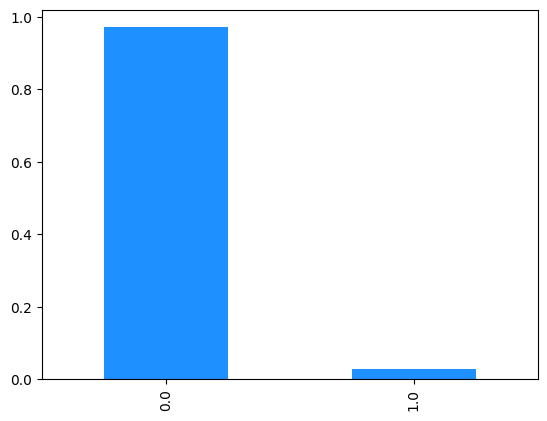

In [36]:
df['top_songs_spotify'].value_counts(normalize=True).plot.bar(color='dodgerblue');

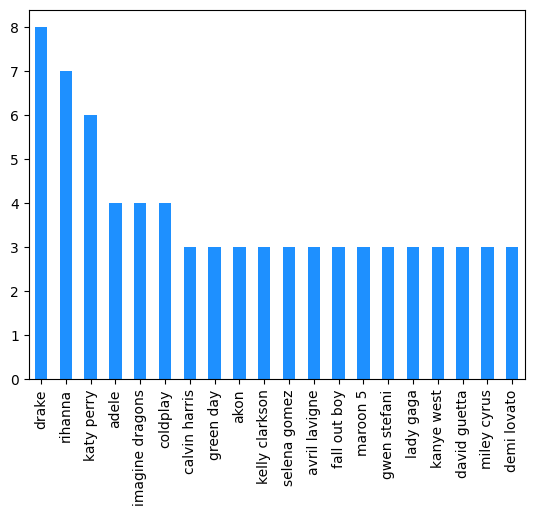

In [37]:
df[df['top_songs_spotify'] == 1]['artist_name'].value_counts()[:20].plot.bar(color='dodgerblue');

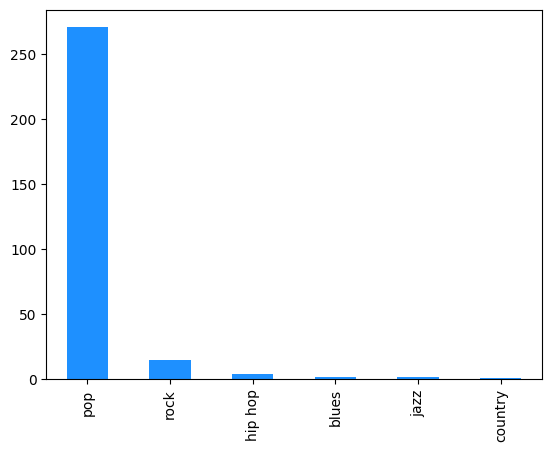

In [38]:
df[df['top_songs_spotify'] == 1]['genre'].value_counts()[:20].plot.bar(color='dodgerblue');

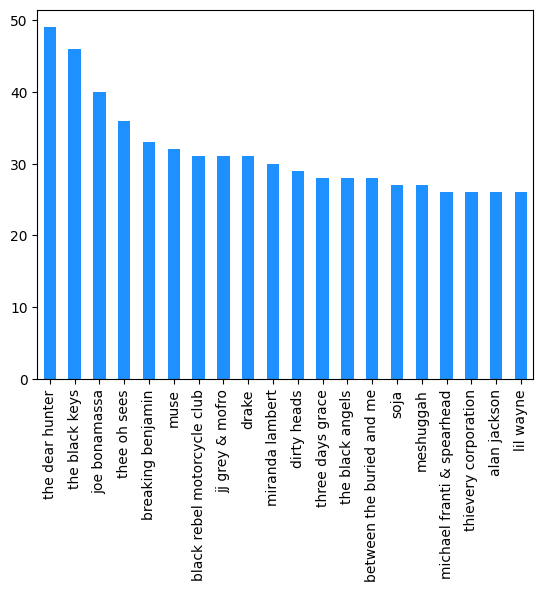

In [39]:
df[df['top_songs_spotify'] == 0]['artist_name'].value_counts()[:20].plot.bar(color='dodgerblue');

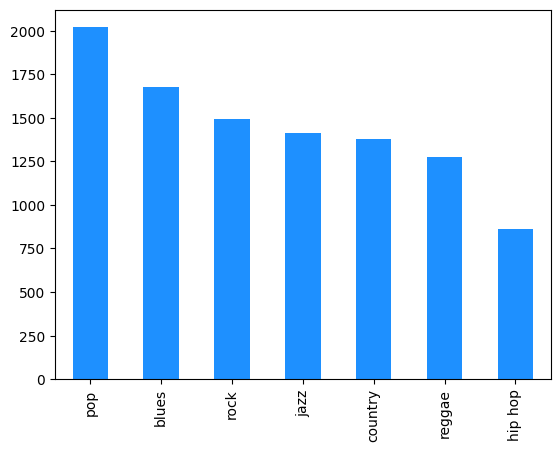

In [40]:
df[df['top_songs_spotify'] == 0]['genre'].value_counts()[:20].plot.bar(color='dodgerblue');

## EDA

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10412 entries, 0 to 10414
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               10412 non-null  object 
 1   track_name                10412 non-null  object 
 2   release_date              10412 non-null  int64  
 3   genre                     10412 non-null  object 
 4   lyrics                    10412 non-null  object 
 5   len                       10412 non-null  int64  
 6   dating                    10412 non-null  float64
 7   violence                  10412 non-null  float64
 8   world/life                10412 non-null  float64
 9   night/time                10412 non-null  float64
 10  shake the audience        10412 non-null  float64
 11  family/gospel             10412 non-null  float64
 12  romantic                  10412 non-null  float64
 13  communication             10412 non-null  float64
 14  obscen

#### Number of characters present in each sentence

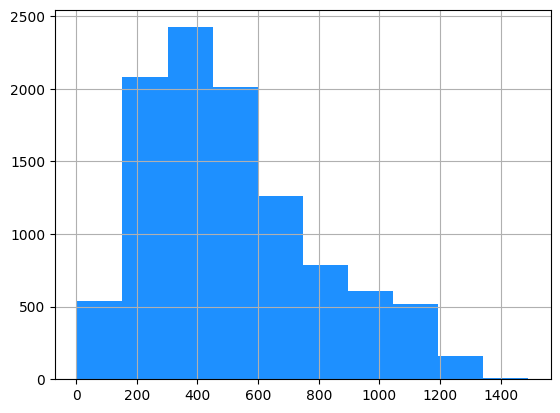

In [44]:
df['lyrics'].str.len().hist(color='dodgerblue');

#### Number of words appearing in each headline.

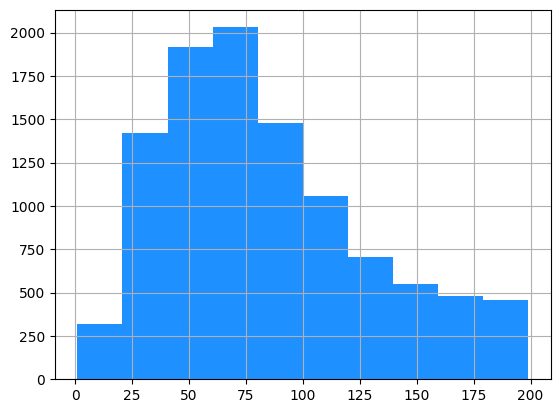

In [53]:
df['lyrics'].str.split().map(lambda x: len(x)).hist(color='dodgerblue');

#### Average word length in each sentence.

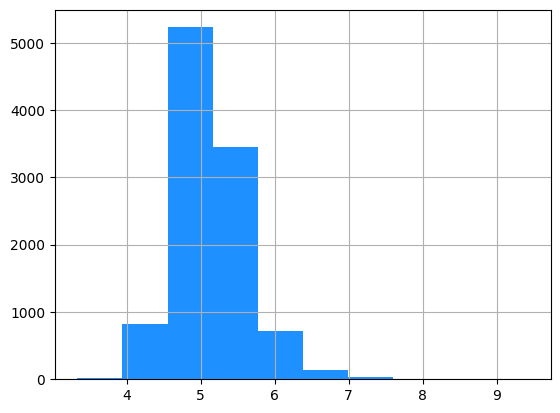

In [54]:
df['lyrics'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(color='dodgerblue');

#### Top popular stop words

In [65]:
import nltk
from nltk.corpus import stopwords
from collections import defaultdict

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aigerimshopenova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
stop=set(stopwords.words('english'))

In [72]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y, color='dodgerblue');

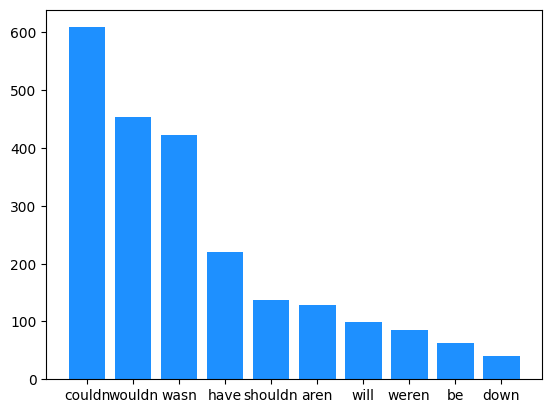

In [73]:
plot_top_stopwords_barchart(df['lyrics'])

#### Top popular words

In [77]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

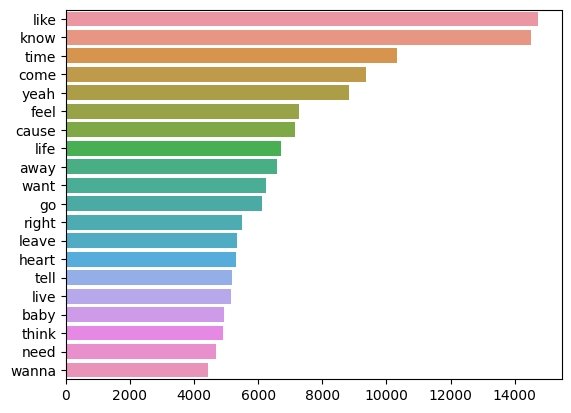

In [78]:
plot_top_non_stopwords_barchart(df['lyrics'])

#### Ngram exploration

In [79]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [83]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

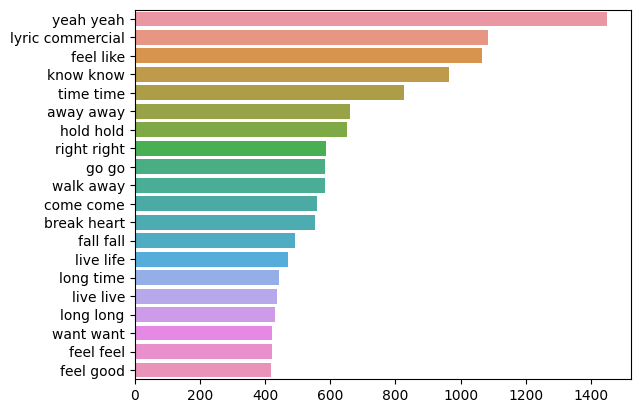

In [84]:
plot_top_ngrams_barchart(df['lyrics'],2)

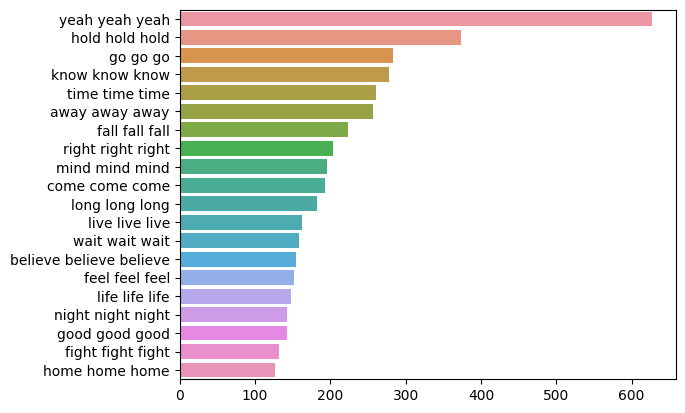

In [85]:
plot_top_ngrams_barchart(df['lyrics'],3)